# Experiment Containers and Sessions

In [ ]:
# use cam_cache.py to demo downloading experiments by cre line, area, and imaging depth

# Filtering cells

In [ ]:
# find some orientation-tuned cells

# NWB Download

In [ ]:
# use cam_cache.py to download NWB files for a list of experiments

# Drifting Gratings Stimulus Table

In [ ]:
# diagram of what condition is on when for DG

# Static Gratings Stimulus Table

In [ ]:
# diagram of what condition is on when for SG

# Natural Scenes Stimulus Table

In [ ]:
# diagram of what condition is on when for NS

# Natural Movie Stimulus Table

In [ ]:
# diagram of what condition is on when for NM1

# Locally Sparse Noise Stimulus Table

In [ ]:
# diagram of what condition is on when for LSN

# Spontaneous Activity Stimulus Table

In [ ]:
# diagram of what condition is on when for SA

# ROI Masks

In [2]:
%load_ext autoreload
%autoreload 2

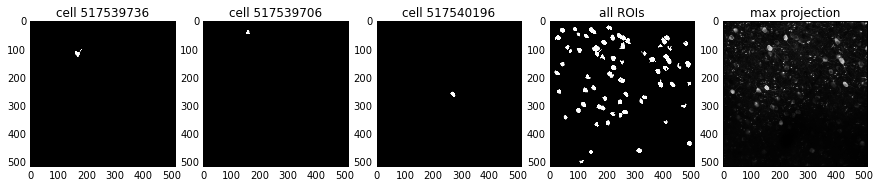

In [6]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data_set = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/510221121.nwb")

# TODO: find some cells that are interesting
cids = data_set.get_cell_specimen_ids()[:15:5]

# get masks for specific cells
roi_mask_list = data_set.get_roi_mask(cell_specimen_ids=cids)

# plot each mask
f, axes = plt.subplots(1, len(cids)+2, figsize=(15, 3))
for ax, roi_mask, cid in zip(axes[:-2], roi_mask_list, cids):
    ax.imshow(roi_mask.get_mask_plane(), cmap='gray')
    ax.set_title('cell %d' % cid)

# make a mask of all ROIs in the experiment    
all_roi_masks = data_set.get_roi_mask()
sum_mask = np.zeros(CamNwbDataSet.MOVIE_FOV_PX)
for roi_mask in all_roi_masks:
    sum_mask[roi_mask.get_mask_plane()>0] = 1

axes[-2].imshow(sum_mask, cmap='gray')
axes[-2].set_title('all ROIs')

# show the movie max projection
max_projection = data_set.get_max_projection()
axes[-1].imshow(max_projection, cmap='gray')
axes[-1].set_title('max projection')

# ROI Analysis

# Neuropil Subtraction

In [ ]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet

# load the cell and neuropil traces
f = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/510221121.nwb")

time, roi_traces = f.get_fluorescence_traces()
_, neuropil_traces = f.get_neuropil_traces()

In [ ]:
from allensdk.cam.r_neuropil import estimate_contamination_ratios

results = estimate_contamination_ratios(roi_traces[0], neuropil_traces[0])

print("r = %f" % results['r'])
print("error = %f" % results['err'])